In [1]:
import nltk, re, pprint
from nltk import word_tokenize
#from urllib import request
import requests
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
r = requests.get(r'https://www.gutenberg.org/files/100/100-0.txt')
r.status_code

200

In [3]:
r.headers['content-type']

'text/plain; charset=UTF-8'

In [4]:
raw = r.text
raw[:50]

'\ufeff\r\nProject Gutenberg’s The Complete Works of Willi'

In [5]:
tokens = word_tokenizekenize(raw)
print(type(tokens))
print(len(tokens))
tokens[:10]

<class 'list'>
1214894


['\ufeff',
 'Project',
 'Gutenberg',
 '’',
 's',
 'The',
 'Complete',
 'Works',
 'of',
 'William']

In [6]:
text = nltk.Text(tokens)
print(type(text))
text.collocations()

<class 'nltk.text.Text'>
KING HENRY; thou art; KING RICHARD; SIR TOBY; Exeunt SCENE; thou hast;
Sir John; QUEEN ELIZABETH; thou shalt; MRS. FORD; KING EDWARD; SECOND
LORD; Thou art; CHIEF JUSTICE; QUEEN MARGARET; SCENE III; FIRST LORD;
thou wilt; dost thou; KING JOHN


In [18]:
### Find beginning and end of text content
raw = raw[(raw.find('\nTHE SONNETS')):(raw.find('* END CONTENT NOTE *'))]

In [19]:
# lower all words
words = [w.lower() for w in tokens]

In [20]:
# Get set() of distinct vocab words
vocab = sorted(set(words))

In [21]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'navy', 'purple',
         'violet', 'black', 'white', 'gray', 'lilac', 'turquoise', 
         'crimson', 'burgundy', 'scarlet', 'lavender', 'silver', 'gold',
         'emerald', 'ivory', 'sable', 'azure', 'cyan', 'cerulean',
         'aqua', 'aquamarine', 'beige', 'brown', 'chartreuse', 'coral',
         'pink', 'rose', 'magenta', 'maroon', 'sienna', 'orchre', 'tan']

In [24]:
# Count colors in works
color_counts = {}
for color in colors:
    color_counts[color] = words.count(color)

In [26]:
# Turn into DataFrame and sort
colors_df = pd.DataFrame.from_dict(color_counts, orient='index')
colors_df = colors_df.rename(index=str, columns={0:'frequency'})
colors_df = colors_df.sort_values(by=['frequency'], ascending=False)

In [41]:
# Select only colors with frequency greater than 0
plot_colors_df = colors_df.loc[colors_df['frequency'] > 0]

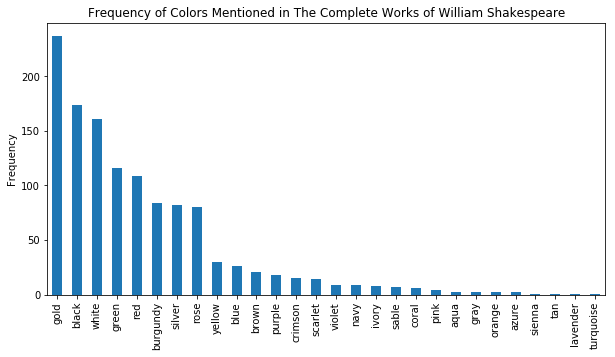

In [45]:
# Plot
plot_colors_df.plot(kind='bar', legend=None, figsize=(10,5))
plt.ylabel('Frequency')
plt.title('Frequency of Colors Mentioned in The Complete Works of William Shakespeare')
plt.savefig(r'd:/Pictures/visualizations/shakespeare_viz.png')